In [1]:
import matplotlib
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
import matplotlib.pyplot as plt

# Setup global font（Liberation Serif）
plt.rcParams['font.family'] = 'Liberation Serif'  # Normal
# plt.rcParams['font.family'] = 'Liberation Serif Bold'  # Bold (if required)
from matplotlib.font_manager import FontProperties
print("Current font:", FontProperties().get_name())


Current font: Liberation Serif


           Water Flow Energy
                   │
       [ Inlet Kinetic Energy ]
                   │
                   ▼
         ┌──────────────────┐
         │   Blade (Rotor)  │
         │                  │
         │     Generate     |
         |   hydrodynamic   |  ← T_aero (Driving torque)
         |      torque      │   
         │        +         |
         | resistant torque │  ← T_inertia (negative inertial torque)
         └──────────────────┘
                   │
                   │          ← Net Torque:
                   │            T_net = T_hydro + T_inertia
                   ▼
         ┌───────────────── ┐
         │  Shaft/generator │
         │                  │
         │ Requried negative| ← M_generator
         │      torque      │   
         └──────────────────┘
                   │
                   ▼
         Output Electricity Energy


## FX-BEMS 3 point results

1. **POINT-1** w=1.0rad/s, U0=2m/s Tinertia

In [ ]:
import numpy as np
from scipy.integrate import trapezoid
import pandas as pd

# Constants
rho = 1025      # kg/m^3
U0 = 2.0        # m/s
omega = 1   # rad/s

# Given discrete data
radii = np.array([2.473, 3.076, 3.678, 4.281, 4.884, 5.486, 6.089, 6.692, 7.295, 7.897, 8.5])
a_prime = np.array([-0.00007,0.00234, 0.00365	, 0.00442	, 0.00487	, 0.00514	,0.00534	, 0.00567	, 0.00637,  0.00802	, 0.01332	])

# Compute integral ∫ a'(r) * r^3 dr using trapezoidal rule
integral = np.trapezoid(a_prime * radii**3, radii)

# Compute inertia torque
T_inertia = 4 * np.pi * rho * U0 * omega * integral  # Nm
T_inertia_kNm = T_inertia / 1e3  # kN·m

# Display results
results = pd.DataFrame({
    'Integral_value_m4': [integral],
    'T_inertia_Nm': [T_inertia],
    'T_inertia_kNm': [T_inertia_kNm]
})
print(results)

   Integral_value_m4   T_inertia_Nm  T_inertia_kNm
0           9.299898  239575.234203     239.575234


2. **POINT-2** w=1.260 rad/s, U0=2m/s Tinertia

In [ ]:
import numpy as np
import pandas as pd

# Input data
omega = 1.26  # rad/s
U0 = 2.0  # m/s
rho = 1025  # water density in kg/m^3
R = np.array([2.774, 3.377, 3.980, 4.582, 5.185, 5.788, 6.391, 6.993, 7.596, 8.199])  # m
Fn_kN = np.array([7.73443, 14.721963, 20.793005, 24.336095, 27.100745, 29.665425,
                  32.394147, 35.403679, 38.736013, 42.526569])  # kN
Fn_N = Fn_kN * 1e3  # Convert to N

# Corrected a' values corresponding to mid-element positions
a_prime_corr = np.array([-0.00006, 0.00217, 0.00345, 0.00420, 0.00463, 0.00485,
                         0.00493, 0.00506, 0.00546, 0.00653])

# Calculate segment widths ΔR
delta_R = np.gradient(R)  # Radial spacing between adjacent elements

# Calculate tangential flow velocity change ΔU_theta = 2 * a' * ω * r
delta_U_theta = 2 * a_prime_corr * omega * R  # m/s

# Calculate inertial torque contribution from each segment (based on angular momentum flux)
# T_inertia = ∫ ρ * ΔU_theta * Fn / U0 * r * 2πR * dR
T_inertia_sections = 2 * np.pi * rho * delta_U_theta * Fn_kN / U0 * R * delta_R  # Contribution from each segment

# Total inertial torque
T_inertia_total = np.sum(T_inertia_sections)

print(T_inertia_total)
print(T_inertia_sections)
print(delta_U_theta)

283685.5287161896
[-1.74736675e+01  1.78270371e+03  5.55563656e+03  1.04915990e+04
  1.65063608e+04  2.35852753e+04  3.18920498e+04  4.28309096e+04
  5.97130238e+04  9.13454439e+04]
[-0.00041943  0.01846679  0.03460212  0.04849589  0.06049651  0.07074094
  0.07939923  0.08916914  0.10451488  0.13491946]


In [ ]:
# Input data
omega = 1.26  # rad/s
U0 = 2.0  # m/s
rho = 1025  # kg/m^3

# Input Data
R = np.array([2.473, 3.076, 3.678, 4.281, 4.884, 5.486, 6.089, 6.692, 7.295, 7.897, 8.500])  # m
a_prime_2 = np.array([-0.00006, 0.00217, 0.00345, 0.00420, 0.00463, 0.00485, 0.00493, 0.00506, 0.00546, 0.00653, 0.00772])

# Compute integral ∫ a'(r) * r^3 dr using trapezoidal rule
integral = np.trapezoid(a_prime_2 * R**3, R)

# Compute inertia torque
T_inertia = 4 * np.pi * rho * U0 * omega * integral  # Nm
T_inertia_kNm = T_inertia / 1e3  # kN·m

# Display results
results = pd.DataFrame({
    'Integral_value_m4': [integral],
    'T_inertia_Nm': [T_inertia],
    'T_inertia_kNm': [T_inertia_kNm]
})
print(results)

   Integral_value_m4   T_inertia_Nm  T_inertia_kNm
0           7.376969  239448.562098     239.448562


3. **POINT-3** w=1.335rad/s, U0=2m/s Tinertia

In [ ]:
rho = 1025      # kg/m^3
U0 = 2.0        # m/s
omega = 1.335   # rad/s

# Given discrete data
radii = np.array([2.473, 3.076, 3.678, 4.281, 4.884, 5.486, 6.089, 6.692, 7.295, 7.897, 8.5])
a_prime_3 = np.array([-0.00007, 0.00215, 0.00342, 0.00417, 0.00458, 0.00422, 0.00528, 0.00526, 0.00497, 0.00495, 0.00465])

# Compute integral ∫ a'(r) * r^3 dr using trapezoidal rule
integral = np.trapezoid(a_prime_3 * radii**3, radii)

# Compute inertia torque
T_inertia = 4 * np.pi * rho * U0 * omega * integral  # Nm
T_inertia_kNm = T_inertia / 1e3  # kN·m

# Display results
results = pd.DataFrame({
    'Integral_value_m4': [integral],
    'T_inertia_Nm': [T_inertia],
    'T_inertia_kNm': [T_inertia_kNm]
})
print(results)

   Integral_value_m4   T_inertia_Nm  T_inertia_kNm
0           6.239999  214599.892551     214.599893


## Visulisation

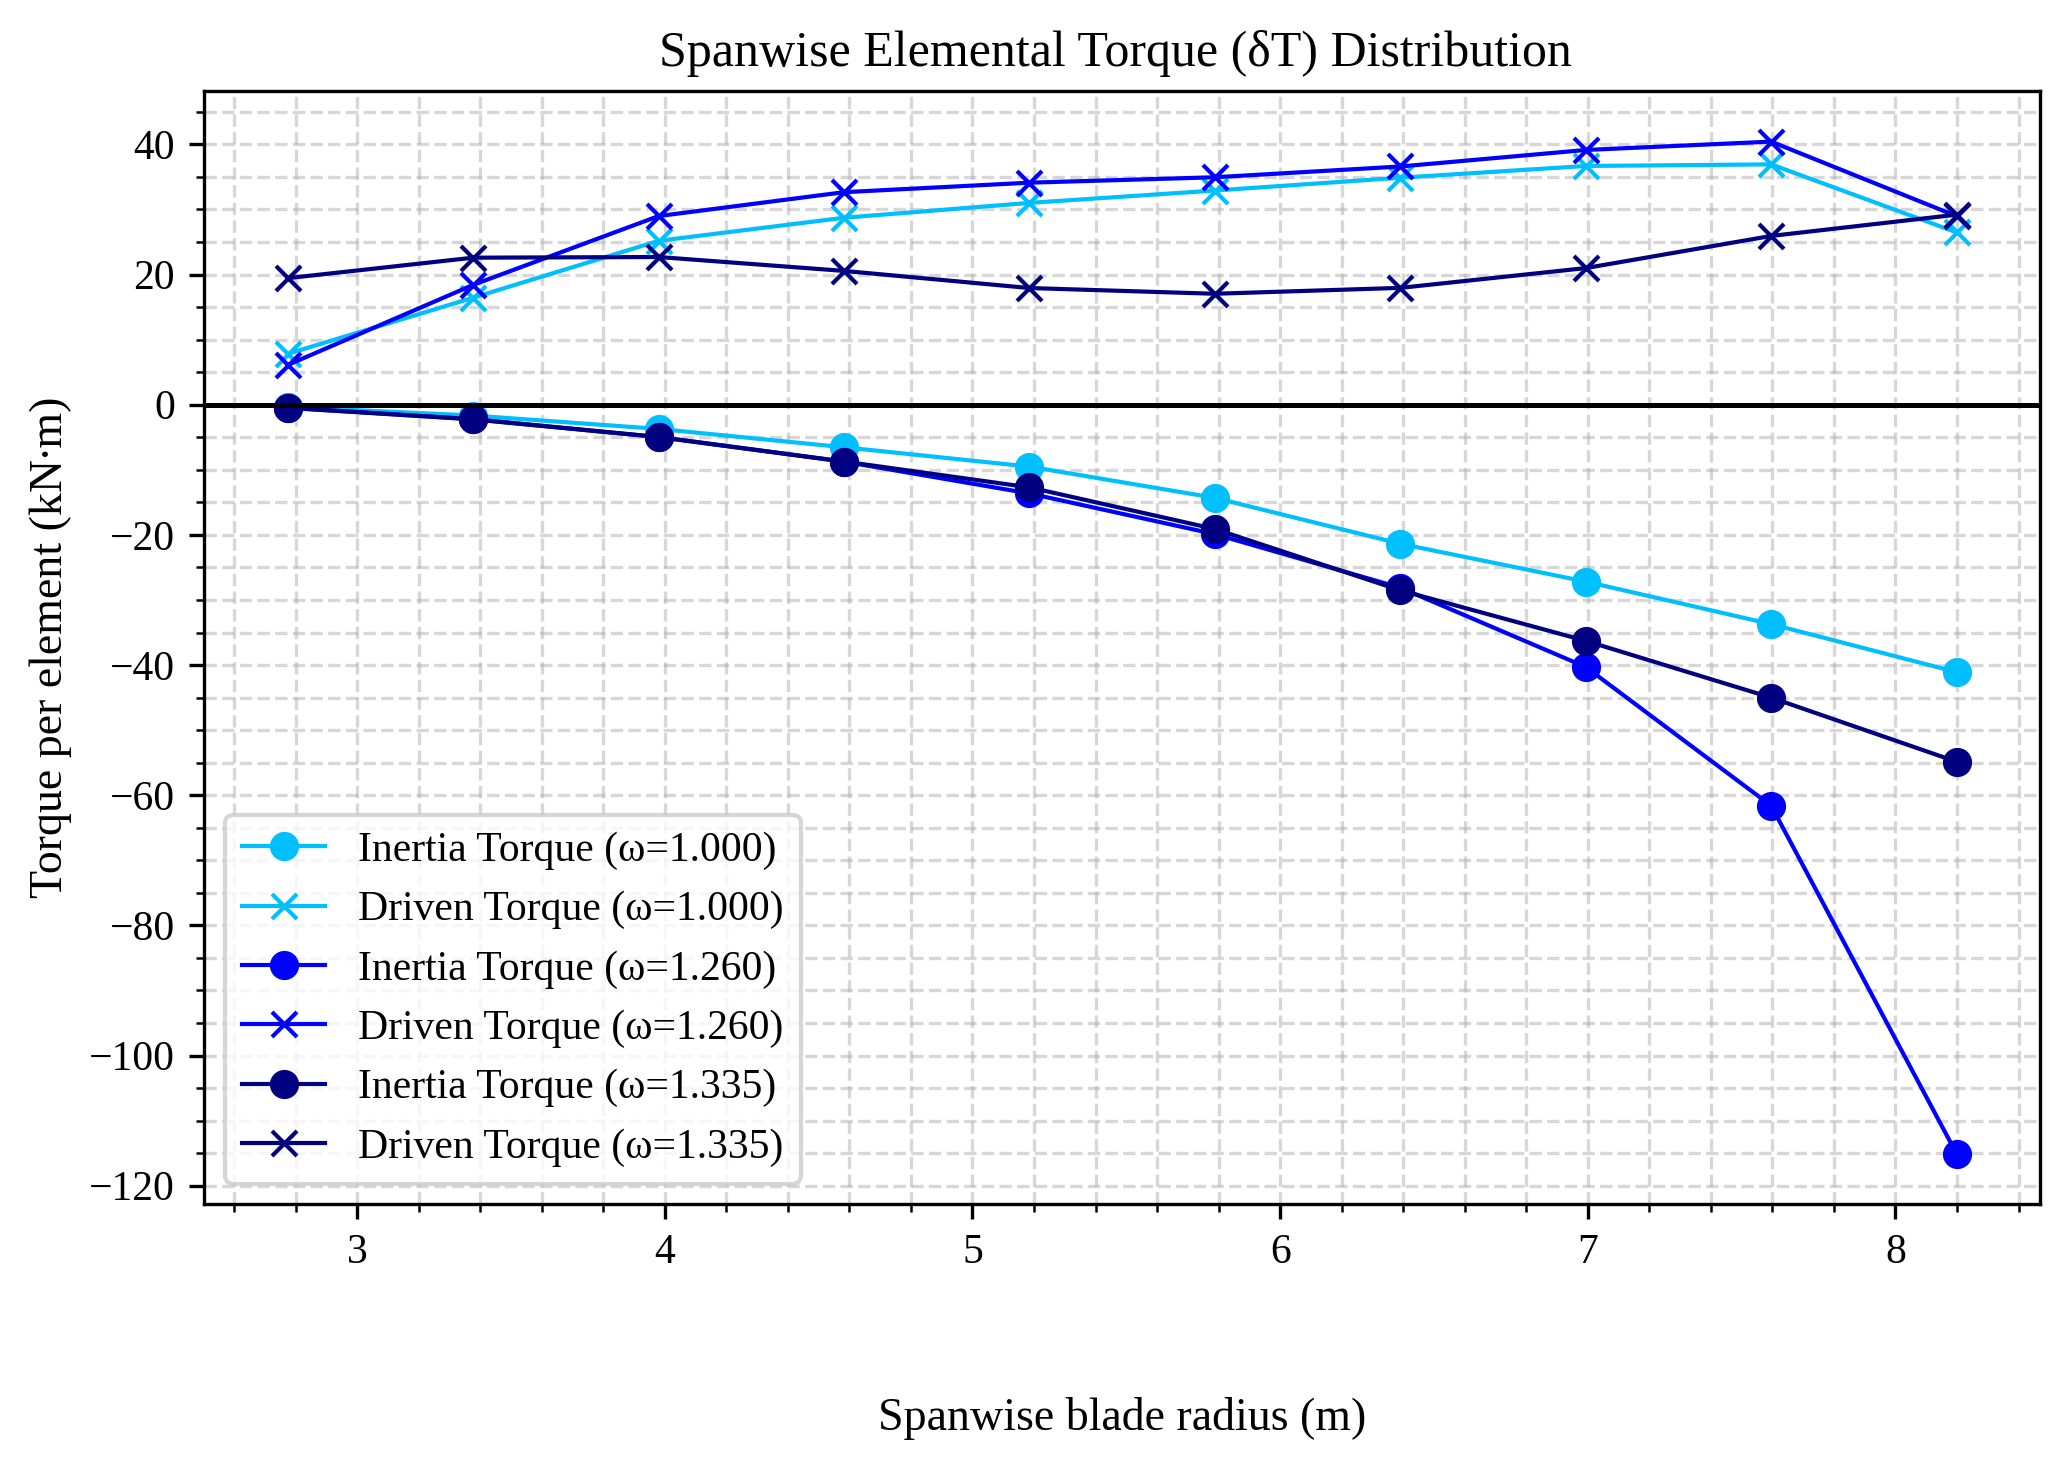

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Radius midpoints (average of adjacent R for plotting)
R = np.array([2.473, 3.076, 3.678, 4.281, 4.884, 5.486, 6.089, 6.692, 7.295, 7.897, 8.500])

# Corresponding a' values for each omega case
a_prime_1 = np.array([-0.00007, 0.00215, 0.00342, 0.00417, 0.00458, 0.00422, 0.00528, 0.00526, 0.00497, 0.00495, 0.00465])
a_prime_1_26 = np.array([0.0, 0.00234, 0.00365, 0.00442, 0.00487, 0.00514, 0.00534, 0.00567, 0.00637, 0.00802, 0.01332])
a_prime_1_335 = np.array([-0.00007, 0.00215, 0.00342, 0.00417, 0.00458, 0.00422, 0.00528, 0.00526, 0.00497, 0.00495, 0.00465])

# Convert to radius edges (dr) and midpoints for trapezoidal integration
dR = np.diff(R)
R_avg = (R[:-1] + R[1:]) / 2

# Inertia calculation constants
rho = 1025  # kg/m^3
U0 = 2
omega_values = [1, 1.26, 1.335]

# Function to calculate T_inertia distribution
def calc_T_inertia(a_prime, omega):
    avg_a = (a_prime[:-1] + a_prime[1:]) / 2
    R3 = R_avg ** 3
    Tinertia = 4 * np.pi * rho * U0 * omega * avg_a * R3 * dR
    return -Tinertia

T_inertia_1 = calc_T_inertia(a_prime_1, 1)
T_inertia_1_26 = calc_T_inertia(a_prime_1_26, 1.26)
T_inertia_1_335 = calc_T_inertia(a_prime_1_335, 1.335)

# Tangential dynamic moments from user-provided data (kNm)
Mdyn_1 = np.array([7.818, 16.441, 25.177, 28.727, 31.008, 32.911, 34.876, 36.683, 36.926, 26.479])
Mdyn_1_26 = np.array([6.109, 18.413, 28.981, 32.655, 34.116, 34.947, 36.603, 39.141, 40.426, 28.973])
Mdyn_1_335 = np.array([19.446, 22.591, 22.693, 20.558, 17.928, 17.047, 17.952, 20.994, 25.932, 29.198])

# Plotting
fig, ax = plt.subplots(figsize=(7, 5), dpi=300)

# Plot Inertia torque (blue gradient) and Plot Dynamic torque (red gradient)
ax.plot(R_avg, T_inertia_1 / 1000, 'o-', label='Inertia Torque (ω=1.000)', color='deepskyblue', linewidth=1)
ax.plot(R_avg, Mdyn_1, 'x-', label='Driven Torque (ω=1.000)', color='deepskyblue', linewidth=1)

ax.plot(R_avg, T_inertia_1_26 / 1000, 'o-', label='Inertia Torque (ω=1.260)', color='blue', linewidth=1)
ax.plot(R_avg, Mdyn_1_26, 'x-', label='Driven Torque (ω=1.260)', color='blue', linewidth=1)

ax.plot(R_avg, T_inertia_1_335 / 1000, 'o-', label='Inertia Torque (ω=1.335)', color='navy', linewidth=1)
ax.plot(R_avg, Mdyn_1_335, 'x-', label='Driven Torque (ω=1.335)', color='navy', linewidth=1)

ax.set_xlabel('Spanwise blade radius (m)', fontsize=11, labelpad=30)
ax.set_ylabel('Torque per element (kN·m)', fontsize=11)
ax.set_title('Spanwise Elemental Torque (δT) Distribution ', fontsize=12)
ax.axhline(0, color='black', linewidth=1.2)
ax.grid(True, which='both', linestyle='--', alpha=0.5)
ax.minorticks_on()
ax.legend()
plt.tight_layout()
plt.show()

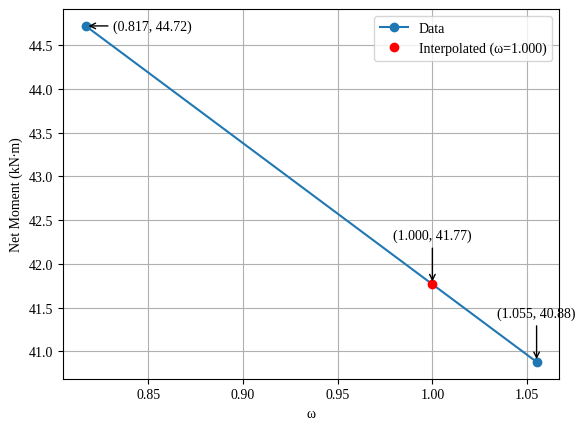

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Linear interpolation of w=1.000
w = np.array([0.817, 1.055])
Mnet = np.array([44.72, 40.88])

def linear_interp(w_target, w_data, M_data):
    return np.interp(w_target, w_data, M_data)

Mnet_1 = linear_interp(1.000, w, Mnet)

plt.plot(w, Mnet, 'o-', label='Data')
plt.plot(1.000, Mnet_1, 'ro', label='Interpolated (ω=1.000)')
plt.annotate(f'({w[0]:.3f}, {Mnet[0]:.2f})', xy=(w[0], Mnet[0]),
             xytext=(20, 0), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), ha='left', va='center')
plt.annotate(f'({w[1]:.3f}, {Mnet[1]:.2f})', xy=(w[1], Mnet[1]),
             xytext=(0, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), ha='center', va='bottom')
plt.annotate(f'(1.000, {Mnet_1:.2f})', xy=(1.000, Mnet_1),
             xytext=(0, 30), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), ha='center', va='bottom')
plt.xlabel('ω'); plt.ylabel('Net Moment (kN·m)'); plt.grid(True)
plt.legend(); plt.show()

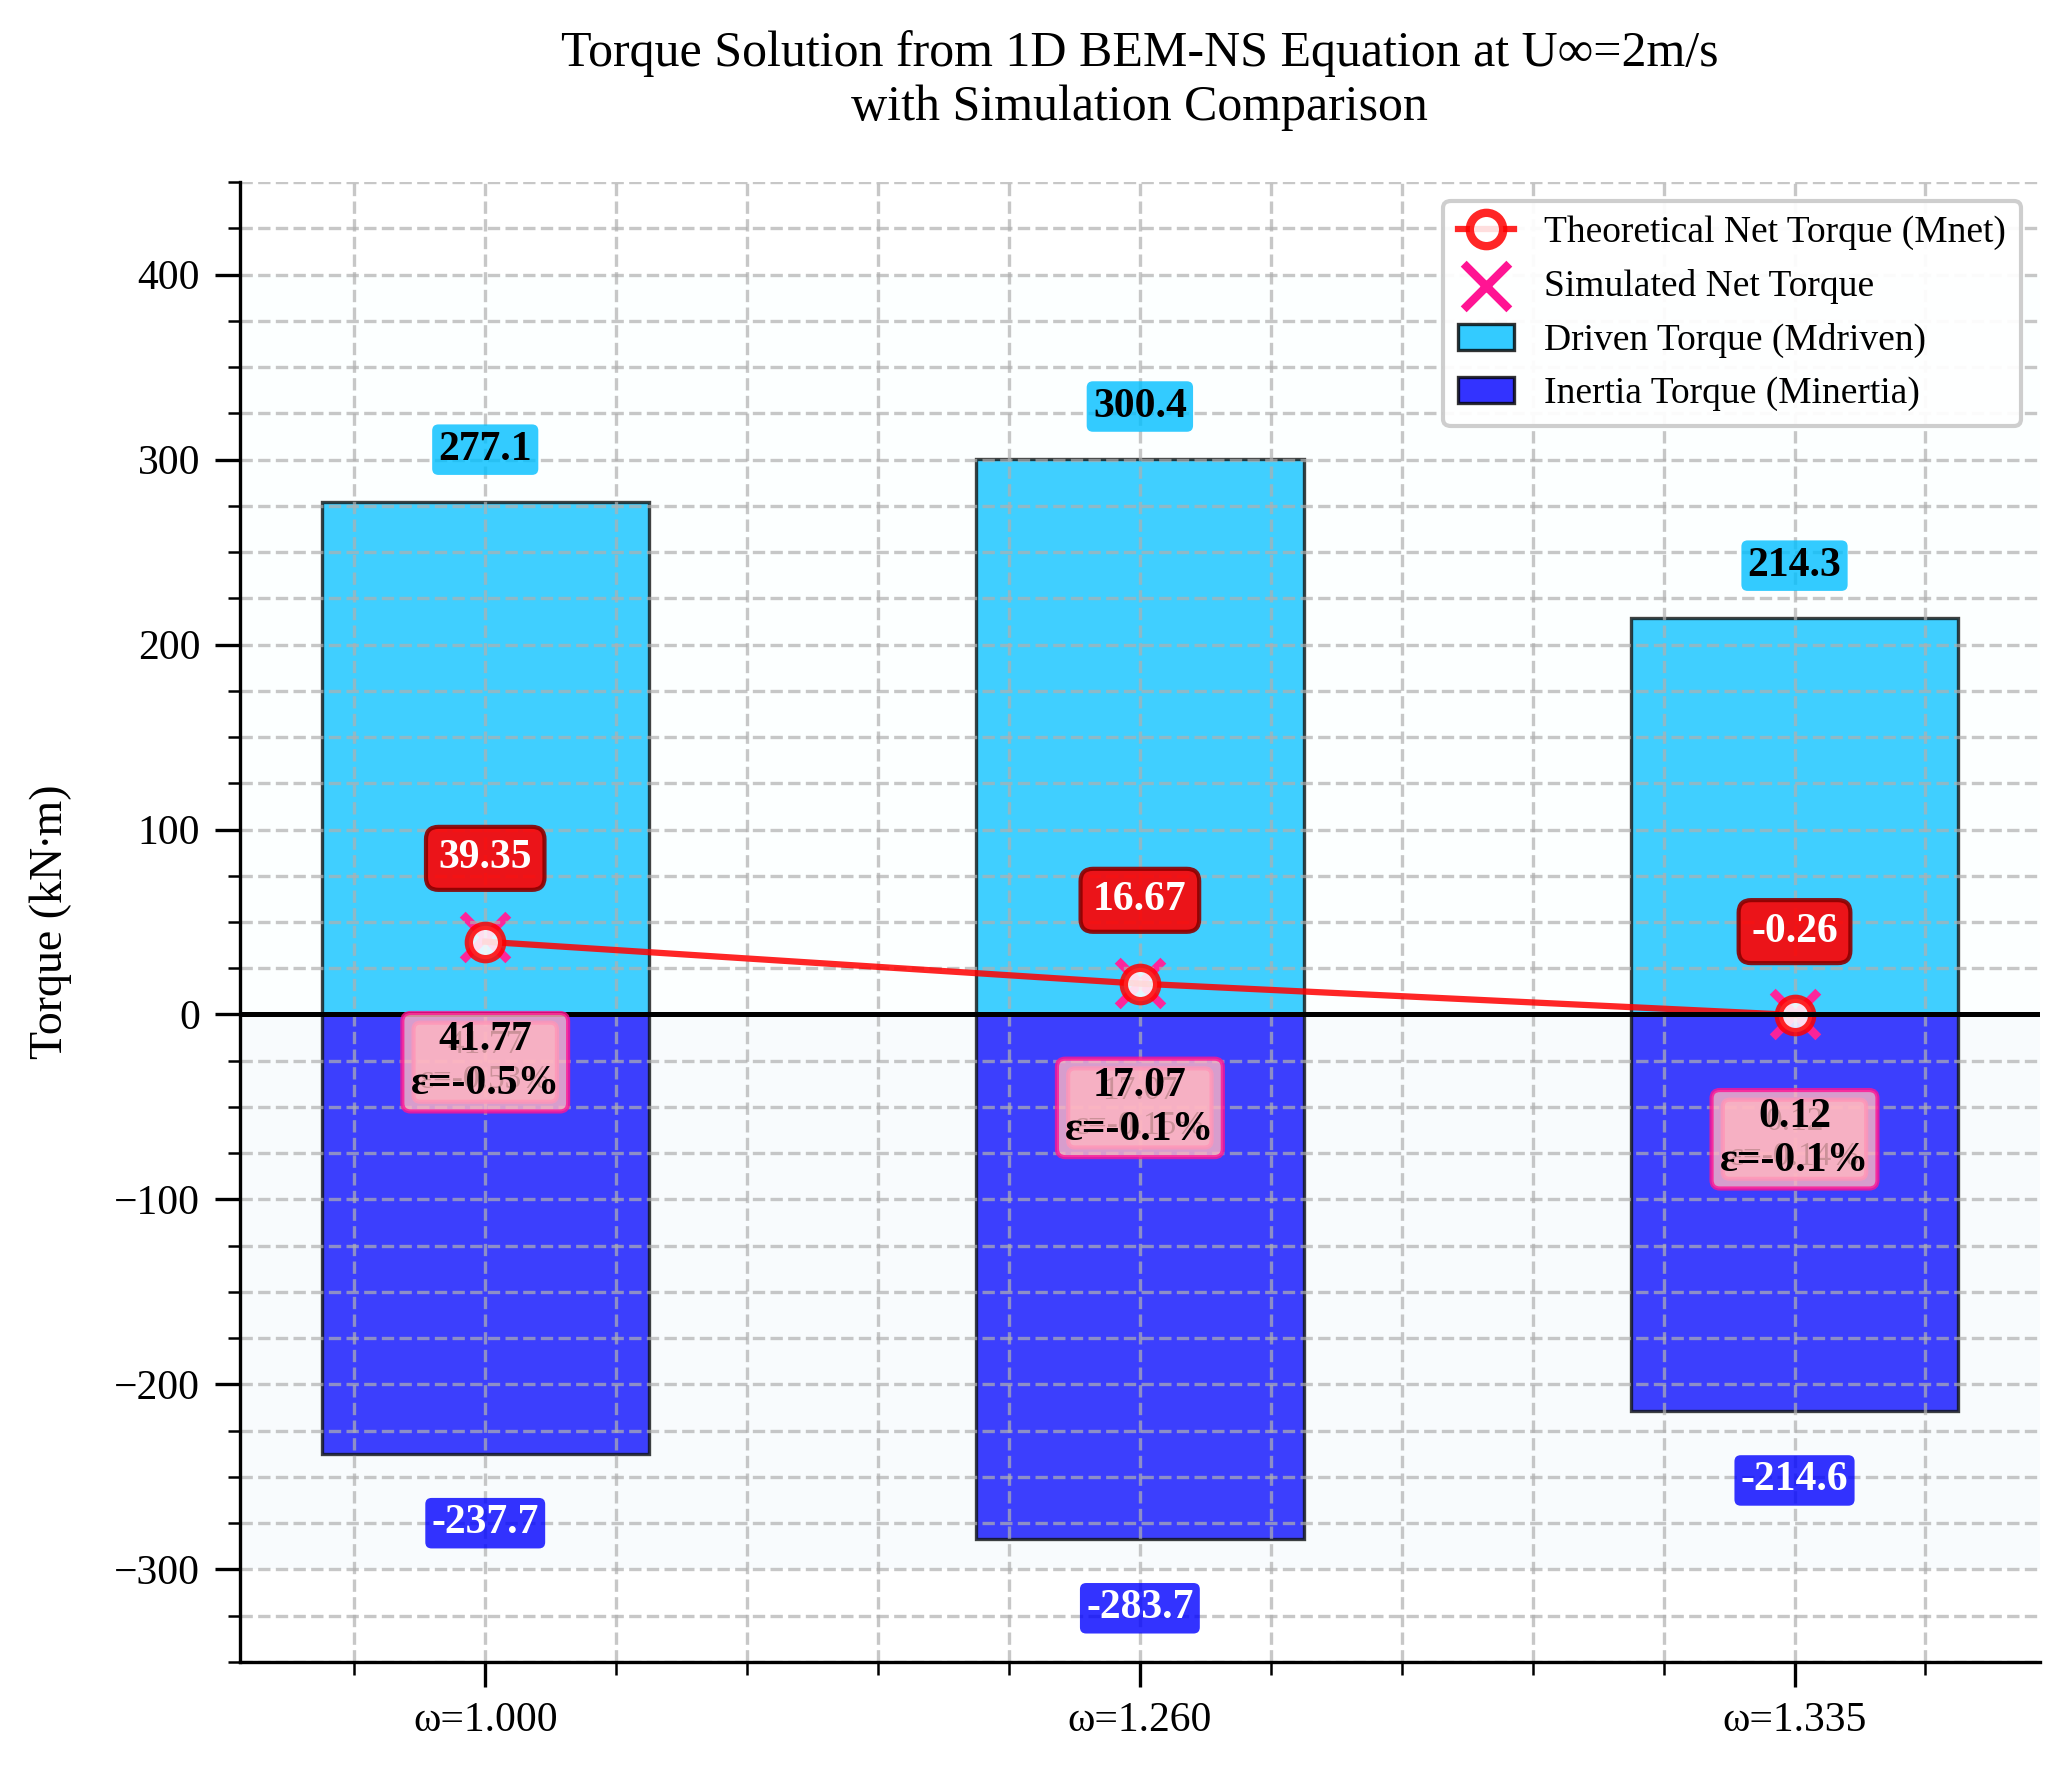

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

omega_labels = ['ω=1.000', 'ω=1.260', 'ω=1.335']
Mdriven = [277.05, 300.37, 214.34]
Minertia = [-237.7, -283.7, -214.6]
Mnet = [39.35, 16.67, -0.26]
Mnet_simul = [41.77, 17.07, 0.12]

def log_error(theo, sim):
    return np.sign(theo - sim) * np.log10(1 + abs(theo - sim))

errors = [log_error(t, s) for t, s in zip(Mnet, Mnet_simul)]

plt.figure(figsize=(7, 6), dpi=300)
ax = plt.gca()
bar_width = 0.5
x = np.arange(len(omega_labels)) # Define x here, before it's used in the loop below

for i, (xi, yi) in enumerate(zip(x, Mnet_simul)):
    ax.annotate(f'{yi:.2f}\nε={errors[i]:+.2f}%',
                (xi, yi),   xytext=(0, -30),  textcoords="offset points", ha='center', va='center',
                color='black', fontsize=8,   bbox=dict(boxstyle="round,pad=0.2",  facecolor='lightpink',  edgecolor='deeppink',  alpha=0.8))

rects1 = ax.bar(x, Mdriven, bar_width, color='deepskyblue', alpha=0.8, edgecolor='black', linewidth=0.8, label='Driven Torque (Mdriven)')
rects2 = ax.bar(x, Minertia, bar_width,  color='blue', alpha=0.8, edgecolor='black', linewidth=0.8, label='Inertia Torque (Minertia)')
line = ax.plot(x, Mnet, 'r-o', linewidth=1.5, markersize=8,
               markerfacecolor='white', markeredgewidth=2, markeredgecolor='red', alpha=0.85, label='Theoretical Net Torque (Mnet)')
scatter = ax.scatter(x, Mnet_simul, s=120, marker='x', color='deeppink', linewidths=2, label='Simulated Net Torque')

def autolabel(rects, offset, is_inertia=False):
    for rect in rects:
        height = rect.get_height()
        va = 'bottom' if height >0 else 'top'

        if is_inertia:
            display_text = f'{height:.1f}'
            color = 'white'
            bgcolor = 'blue'
        else:
            display_text = f'{abs(height):.1f}'
            color = 'black'
            bgcolor = 'deepskyblue'

        ax.annotate(display_text,
                    xy=(rect.get_x() + rect.get_width()/2, height),     xytext=(0, offset),    textcoords="offset points",    ha='center', va=va, fontsize=10,  color=color, weight='bold',
                    bbox=dict(boxstyle="round,pad=0.15",    facecolor=bgcolor,    edgecolor='none',  alpha=0.8))

autolabel(rects1, 8, is_inertia=False)
autolabel(rects2, -12, is_inertia=True)

for i, (xi, yi) in enumerate(zip(x, Mnet)):
    ax.annotate(f'{yi:.2f}',   (xi, yi), xytext=(0, 20),
                textcoords="offset points",      ha='center', va='center',         color='white', fontsize=10, weight='bold',
                bbox=dict(boxstyle="round,pad=0.3",       facecolor='red',      edgecolor='darkred',      alpha=0.9))
for i, (xi, yi) in enumerate(zip(x, Mnet_simul)):
    ax.annotate(f'{yi:.2f}\nε={errors[i]:.1f}%',
                (xi, yi),
                xytext=(0, -30),      textcoords="offset points",     ha='center', va='center',
                color='black', fontsize=10, weight='bold', bbox=dict(boxstyle="round,pad=0.2",   facecolor='lightpink',   edgecolor='deeppink',  alpha=0.8))

ax.set_ylabel('Torque (kN·m)', fontsize=11, labelpad=10)
ax.set_title('Torque Solution from 1D BEM-NS Equation at U∞=2m/s\nwith Simulation Comparison', fontsize=12, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(omega_labels)
ax.grid(True, which='both', linestyle='--', alpha=0.7)
ax.minorticks_on()
ax.axhline(0, color='black', linewidth=1.2)

ax.legend(loc='upper right', framealpha=0.95,     fontsize=9, handlelength=1.5,  bbox_to_anchor=(1.0, 1))
ax.set_ylim(-350, 450)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.tick_params(axis='both', which='major', length=6)
ax.tick_params(axis='both', which='minor', length=3)
ax.axhspan(-300, 0, facecolor='lightblue', alpha=0.08)
ax.axhspan(0, 400, facecolor='lightcyan', alpha=0.08)

plt.tight_layout()
plt.show()

plt.savefig('torque_analysis.png', dpi=300, bbox_inches='tight')